# K-means clustering

## import library

In [682]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [683]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

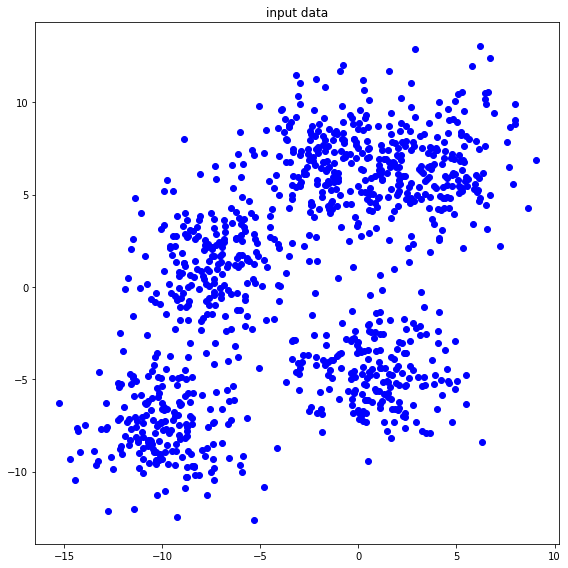

In [684]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [685]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    distance = np.sqrt(np.sum((feature - center)**2,axis = 1))



    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [686]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    
    centroid = np.mean(feature[np.where(label_feature==label)],axis = 0)
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [687]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature = np.argmin(distance,axis = 1)


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [688]:
number_cluster          = 2
number_iteration        = 100    # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [689]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    for j in range(number_cluster):
        if len(np.where(label_feature_02==j)[0])==0:
            centroid_iteration_02[i] = centroid_iteration_02[i-1]
        else:
            centroid_iteration_02[i][j] = compute_centroid(feature,label_feature_02,j)
    distance = []        
    for k in range(number_cluster):
        temp = compute_distance(feature,centroid_iteration_02[i][k])
        distance = np.hstack([distance,temp])
    distance = np.transpose(np.reshape(distance,(number_cluster,distance.shape[0]//number_cluster)))
    label_feature_02 = compute_label(distance)
    loss = 0
    for q in range(number_cluster):
        loss = loss+np.sum(np.square(feature[np.where(label_feature_02==q)]-centroid_iteration_02[i][q]))
    loss_iteration_02[i] = loss/feature.shape[0]
    


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [690]:
number_cluster          = 4
number_iteration        = 100     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [691]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    for j in range(number_cluster):
        if len(np.where(label_feature_04==j)[0])==0:
            centroid_iteration_04[i] = centroid_iteration_04[i-1]
        else:
            centroid_iteration_04[i][j] = compute_centroid(feature,label_feature_04,j)
    distance = []        
    for k in range(number_cluster):
        temp = compute_distance(feature,centroid_iteration_04[i][k])
        distance = np.hstack([distance,temp])
    distance = np.transpose(np.reshape(distance,(number_cluster,distance.shape[0]//number_cluster)))
    label_feature_04 = compute_label(distance)
    loss = 0
    for q in range(number_cluster):
        loss = loss+np.sum(np.square(feature[np.where(label_feature_04==q)]-centroid_iteration_04[i][q]))
    loss_iteration_04[i] = loss/feature.shape[0]
    


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [692]:
number_cluster          = 8
number_iteration        = 100    # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [693]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    for j in range(number_cluster):
        if len(np.where(label_feature_08==j)[0])==0:
            centroid_iteration_08[i] = centroid_iteration_08[i-1]
        else:
            centroid_iteration_08[i][j] = compute_centroid(feature,label_feature_08,j)
    distance = []        
    for k in range(number_cluster):
        temp = compute_distance(feature,centroid_iteration_08[i][k])
        distance = np.hstack([distance,temp])
    distance = np.transpose(np.reshape(distance,(number_cluster,distance.shape[0]//number_cluster)))
    label_feature_08 = compute_label(distance)
    loss = 0
    for q in range(number_cluster):
        loss = loss+np.sum(np.square(feature[np.where(label_feature_08==q)]-centroid_iteration_08[i][q]))
    loss_iteration_08[i] = loss/feature.shape[0]



#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [782]:
number_cluster          = 16
number_iteration        = 100     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [783]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
for i in range(number_iteration):
    for j in range(number_cluster):
        if len(np.where(label_feature_16==j)[0])==0:
            centroid_iteration_16[i] = centroid_iteration_16[i-1]
        else:
            centroid_iteration_16[i][j] = compute_centroid(feature,label_feature_16,j)
    distance = []        
    for k in range(number_cluster):
        temp = compute_distance(feature,centroid_iteration_16[i][k])
        distance = np.hstack([distance,temp])
    distance = np.transpose(np.reshape(distance,(number_cluster,distance.shape[0]//number_cluster)))
    label_feature_16 = compute_label(distance)
    loss = 0
    for q in range(number_cluster):
        loss = loss+np.sum(np.square(feature[np.where(label_feature_16==q)]-centroid_iteration_16[i][q]))
    loss_iteration_16[i] = loss/feature.shape[0]


#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

In [784]:
centroid_iteration_16[99] == centroid_iteration_16[0]

array([[ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

---

---

## functions for presenting the results

---

---

In [696]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [697]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [698]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [699]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [700]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [701]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [702]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [703]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [704]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    plt.plot([centroid_iteration_02[0][0][0],centroid_iteration_02[number_iteration-1][0][0]],[centroid_iteration_02[0][0][1],centroid_iteration_02[number_iteration-1][0][1]],color = 'orange',label = "cluster=0")
    plt.plot([centroid_iteration_02[0][1][0],centroid_iteration_02[number_iteration-1][1][0]],[centroid_iteration_02[0][1][1],centroid_iteration_02[number_iteration-1][1][1]],color = 'blue',label = "cluster=1")
    plt.scatter(centroid_iteration_02[0][0][0],centroid_iteration_02[0][0][1],marker = 'o',color = 'blue',label = 'initial')
    plt.scatter(centroid_iteration_02[0][1][0],centroid_iteration_02[0][1][1],marker = 'o',color = 'blue')
    plt.scatter(centroid_iteration_02[number_iteration-1][0][0],centroid_iteration_02[number_iteration-1][0][1],marker = 's',color = 'red',label = 'final')
    plt.scatter(centroid_iteration_02[number_iteration-1][1][0],centroid_iteration_02[number_iteration-1][1][1],marker = 's',color = 'red')
    plt.legend(loc="upper left")


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [705]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(4):
        plt.plot([centroid_iteration_04[0][i][0],centroid_iteration_04[number_iteration-1][i][0]],[centroid_iteration_04[0][i][1],centroid_iteration_04[number_iteration-1][i][1]],label = "cluster={0}".format(i))
    
    plt.scatter(centroid_iteration_04[0][0][0],centroid_iteration_04[0][0][1],marker = 'o',color = 'blue',label = 'initial')
    plt.scatter(centroid_iteration_04[number_iteration-1][0][0],centroid_iteration_04[number_iteration-1][0][1],marker = 's',color = 'red',label = 'final')
        
    for i in range(1,4):
        plt.scatter(centroid_iteration_04[0][i][0],centroid_iteration_04[0][i][1],marker = 'o',color = 'blue')
        plt.scatter(centroid_iteration_04[number_iteration-1][i][0],centroid_iteration_04[number_iteration-1][i][1],marker = 's',color = 'red')
    plt.legend(loc="upper left")

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [789]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(8):
        plt.plot([centroid_iteration_08[0][i][0],centroid_iteration_08[number_iteration-1][i][0]],[centroid_iteration_08[0][i][1],centroid_iteration_08[number_iteration-1][i][1]],label = 'cluster={0}'.format(i))
        
    plt.scatter(centroid_iteration_08[0][0][0],centroid_iteration_08[0][0][1],marker = 'o',color = 'blue',label = 'initial')
    plt.scatter(centroid_iteration_08[number_iteration-1][0][0],centroid_iteration_08[number_iteration-1][0][1],marker = 's',color = 'red',label = 'final')
    for i in range(1,8):
        plt.scatter(centroid_iteration_08[0][i][0],centroid_iteration_08[0][i][1],marker = 'o',color = 'blue')
        plt.scatter(centroid_iteration_08[number_iteration-1][i][0],centroid_iteration_08[number_iteration-1][i][1],marker = 's',color = 'red')
    plt.legend(loc="upper left")
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [794]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    for i in range(16):
        x = [centroid_iteration_16[0][i][0],centroid_iteration_16[number_iteration-1][i][0]]
        y = [centroid_iteration_16[0][i][1],centroid_iteration_16[number_iteration-1][i][1]]
        if x==y:
            pass
        else:
            plt.plot(x,y,label = 'cluster={0}'.format(i))
        
    plt.scatter(centroid_iteration_16[0][15][0],centroid_iteration_16[0][15][1],marker = 'o',color = 'blue',label = 'initial')
    plt.scatter(centroid_iteration_16[number_iteration-1][15][0],centroid_iteration_16[number_iteration-1][15][1],marker = 's',color = 'red',label = 'final')
    for i in range(15):
        plt.scatter(centroid_iteration_16[0][i][0],centroid_iteration_16[0][i][1],marker = 'o',color = 'blue')
        plt.scatter(centroid_iteration_16[number_iteration-1][i][0],centroid_iteration_16[number_iteration-1][i][1],marker = 's',color = 'red')
    plt.legend(loc="upper left")
    


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [708]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = colors.ListedColormap(['red','blue'])
    norm = colors.BoundaryNorm(np.arange(-0.5,2,1), cmap.N)
    plt.scatter(feature[:,0],feature[:,1],c = label_feature_02,norm = norm,cmap = cmap)

    plt.colorbar(ticks=np.array([0,1]),label = 'cluster')
    
    plt.tight_layout()
    plt.show()
   


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [709]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5,4.5,1), cmap.N)
    plt.scatter(feature[:,0],feature[:,1],c = label_feature_04,norm = norm,cmap = cmap)

    plt.colorbar(ticks=np.arange(0,4,1),label = 'cluster')
    
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [710]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5,8.5,1), cmap.N)
    plt.scatter(feature[:,0],feature[:,1],c = label_feature_08,norm = norm,cmap = cmap)

    plt.colorbar(ticks=np.arange(0,8,1),label = 'cluster')
    
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [711]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    cmap = plt.cm.rainbow
    norm = colors.BoundaryNorm(np.arange(-0.5,16.5,1), cmap.N)
    plt.scatter(feature[:,0],feature[:,1],c = label_feature_16,norm = norm,cmap = cmap)

    plt.colorbar(ticks=np.arange(0,16,1),label = 'cluster')
    
    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1123356206
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.6797043226
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  8.2590734254
**************************************************
## [RESULT 05]
**************************************************


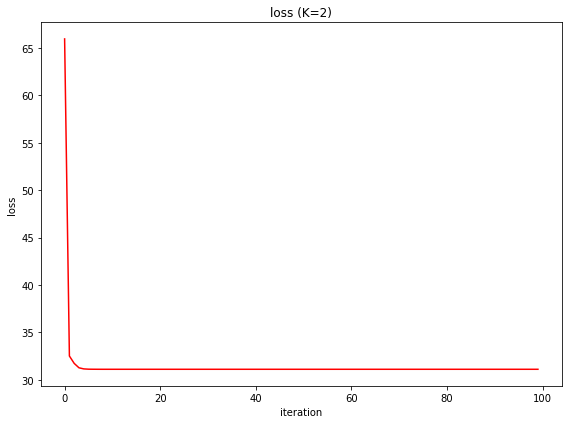

**************************************************
## [RESULT 06]
**************************************************


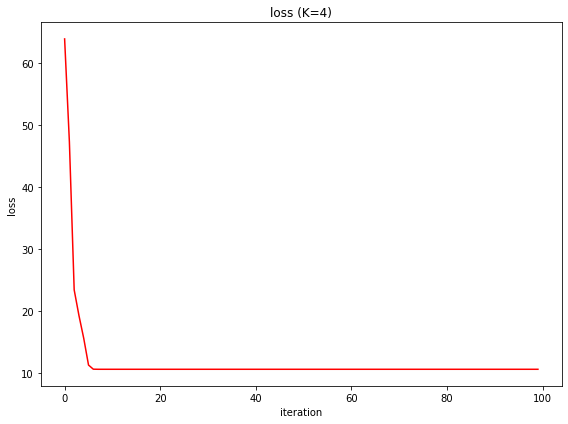

**************************************************
## [RESULT 07]
**************************************************


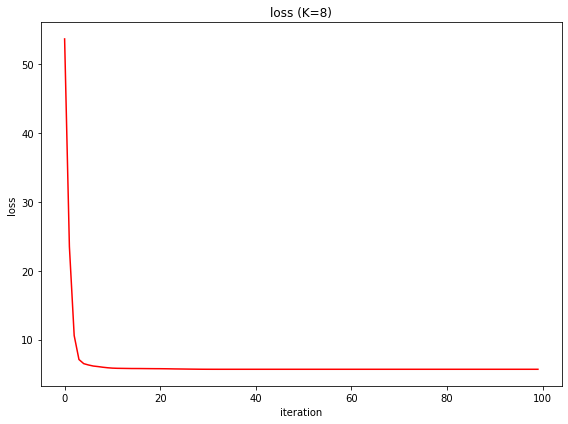

**************************************************
## [RESULT 08]
**************************************************


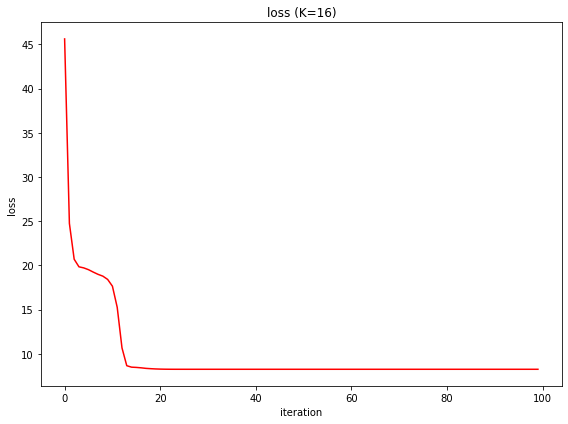

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************


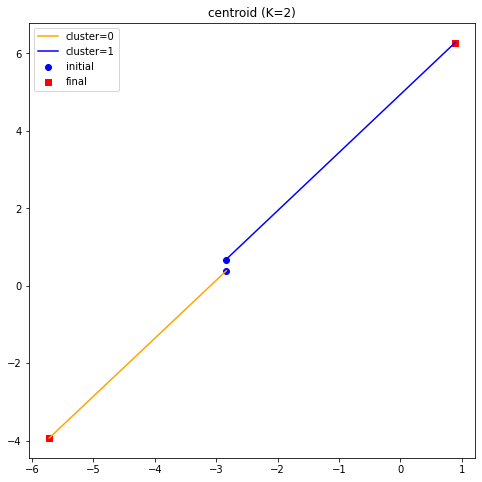

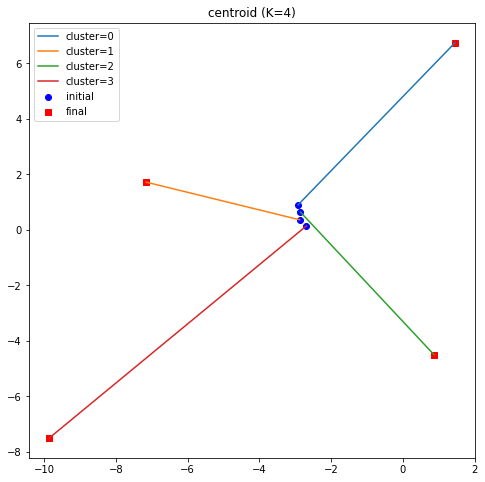

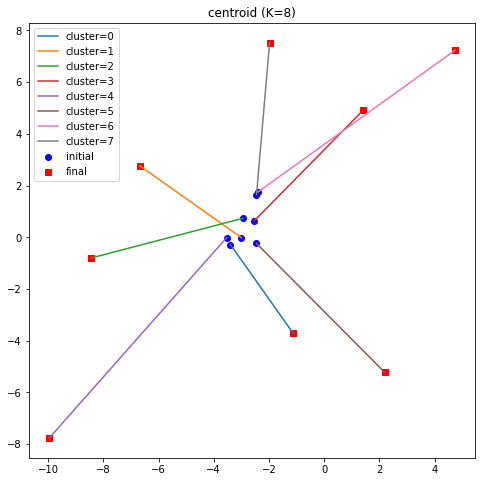

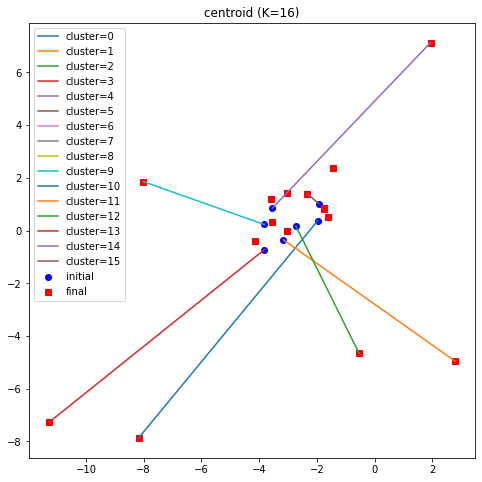

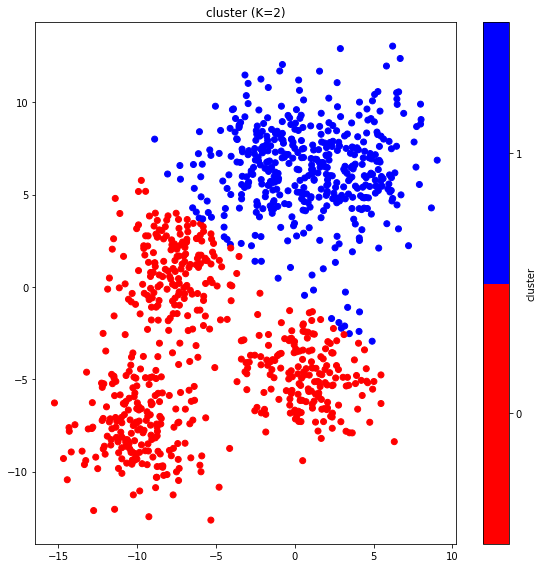

**************************************************
## [RESULT 14]
**************************************************


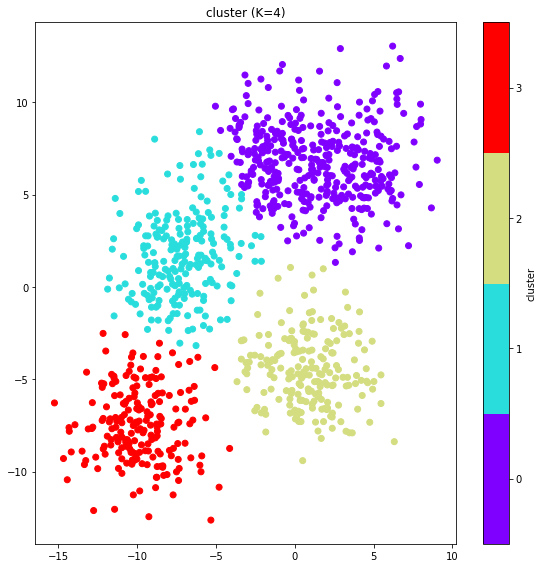

**************************************************
## [RESULT 15]
**************************************************


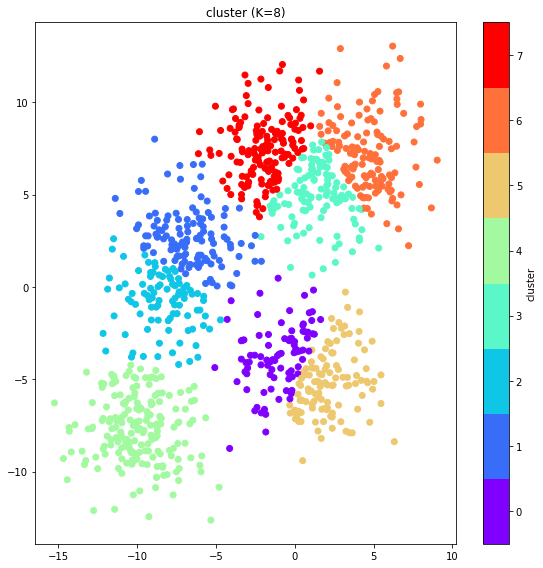

**************************************************
## [RESULT 16]
**************************************************


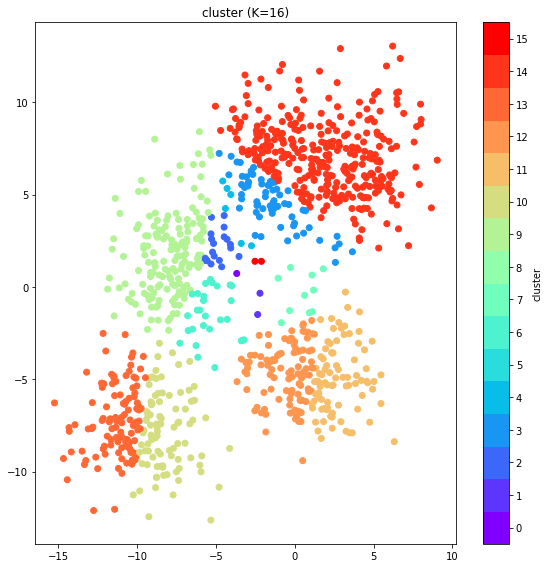

In [796]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)